In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv('income.csv' )
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


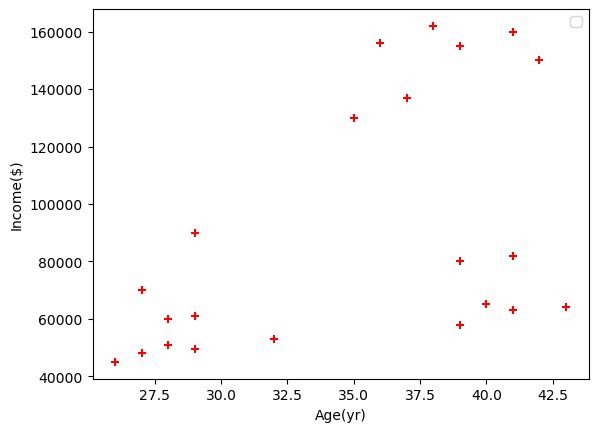

In [11]:
plt.scatter(df['Age'], df['Income($)'], marker='+' , color='red')
plt.xlabel("Age(yr)")
plt.ylabel("Income($)")
plt.legend()

In [13]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [15]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

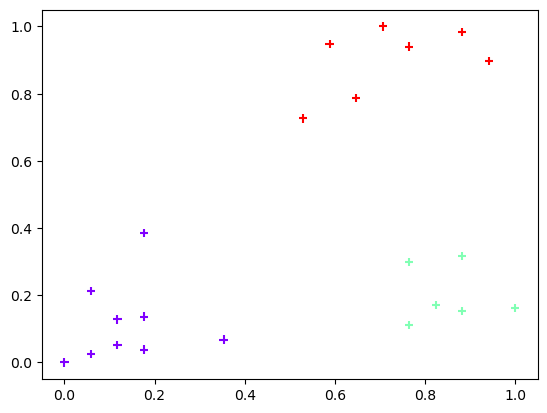

In [34]:
df['cluster'] = y_predicted
plt.scatter(df['Age'], df['Income($)'], c=df['cluster'], cmap='rainbow', marker='+')
# plt.scatter?

In [21]:
# MinMax Scaling used for scalling all the data's in some range
scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Income($)']])
df[['Age', 'Income($)']] = scaler.transform(df[['Age', 'Income($)']])
# plt.scatter(df['Age'], df['Income($)'], c=df['cluster'], cmap='rainbow', marker='+')

In [36]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted
df.cluster.head()

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    1
1    1
2    1
3    1
4    0
Name: cluster, dtype: int32

In [27]:
centroids = km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

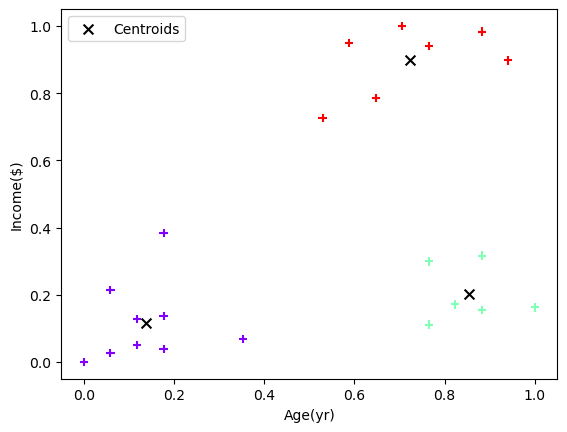

In [32]:
plt.scatter(df['Age'], df['Income($)'], c=df['cluster'], cmap='rainbow', marker='+')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=50, label='Centroids')
plt.xlabel("Age(yr)")
plt.ylabel("Income($)")
plt.legend()

In [37]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[5.434011511988176, 2.0911363886990766, 0.47507834985530945, 0.3687734076440589, 0.32657706599188674, 0.26016449151412036, 0.18275153026579993, 0.14090581089405502, 0.12745351865290946]


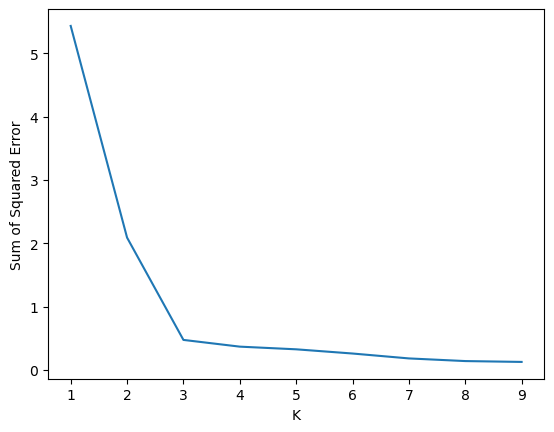

In [39]:
print(sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng, sse)